In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

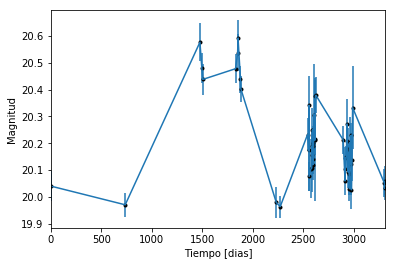

In [2]:
data = np.genfromtxt('LC_U_49159.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

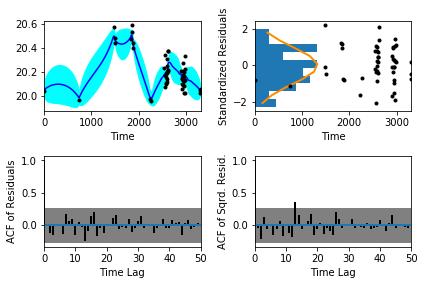

In [5]:
sample.assess_fit()

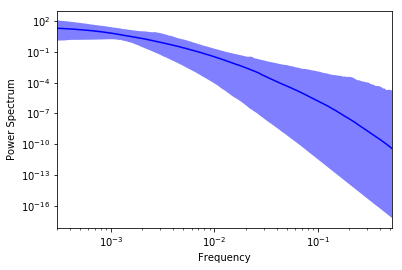

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

NameError: name 'noise_level' is not defined

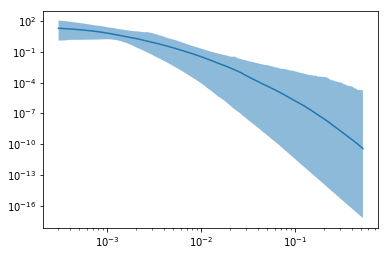

In [7]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

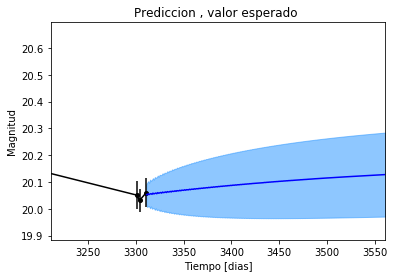

In [8]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

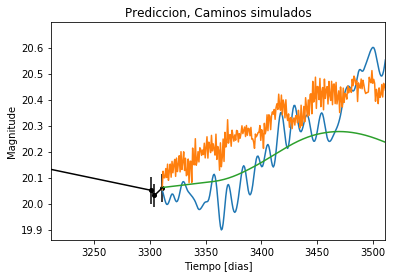

In [9]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 3
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


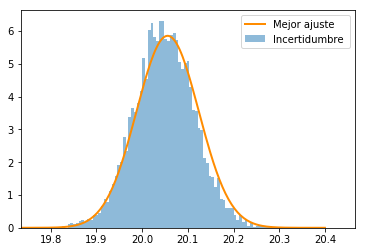

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

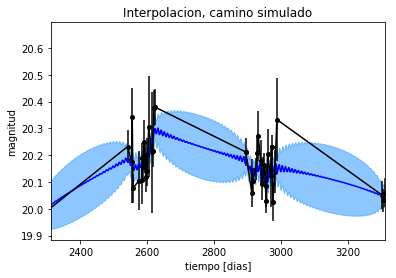

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

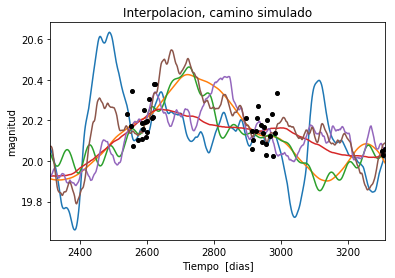

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [15]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 488.484655132
Median: 0.0275064763463
Standard deviation: 0.252004964007
68% credibility interval: [ 0.          0.41249969]
95% credibility interval: [ 0.          0.86760593]
99% credibility interval: [ 0.          1.00242553]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 488.484655132
Median: 0.0275064763463
Standard deviation: 0.252004964007
68% credibility interval: [ 0.          0.41249969]
95% credibility interval: [ 0.          0.86760593]
99% credibility interval: [ 0.          1.00242553]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1652.63471547
Median: 0.0
Standard deviation: 0.000805220893562
68% cr

Plotting parameter summary


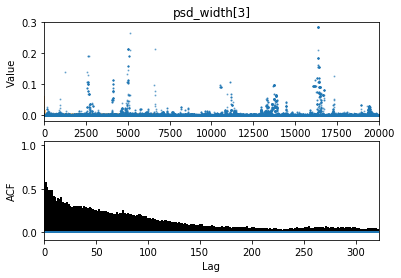

In [16]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [17]:

centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1595.06183327
Median: 67.115274529
Standard deviation: 1.58784945181
68% credibility interval: [ 65.32326131  68.19952278]
95% credibility interval: [ 62.85480893  68.95110352]
99% credibility interval: [ 60.75231148  69.52257616]


In [19]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 508.520029351
Median: 0.613634209418
Standard deviation: 2.15973323648
68% credibility interval: [ 0.05823794  3.59643542]
95% credibility interval: [ 0.01339462  7.36525492]
99% credibility interval: [  1.02819236e-02   1.06200731e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 669.243935859
Median: 0.680147558792
Standard deviation: 9.14007092582
68% credibility interval: [  0.02373434  10.23064312]
95% credibility interval: [  1

In [21]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [22]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 11332.7465771
Median: 1.92511474984e-24
Standard deviation: 7.83857423104e+19
68% credibility interval: [  9.72046992e-61   1.01380761e-06]
95% credibility interval: [  7.49266896e-114   3.32710034e+002]
99% credibility interval: [  4.26234253e-125   5.00316468e+010]


In [23]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [24]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2950.37280434
Median: 20.1738807277
Standard deviation: 0.112126667267
68% credibility interval: [ 20.07376518  20.26228395]
95% credibility interval: [ 19.92550884  20.37817286]
99% credibility interval: [ 19.79626282  20.51207341]


In [25]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [26]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 488.484655132
Median: 0.0275064763463
Standard deviation: 0.252004964007
68% credibility interval: [ 0.          0.41249969]
95% credibility interval: [ 0.          0.86760593]
99% credibility interval: [ 0.          1.00242553]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 488.484655132
Median: 0.0275064763463
Standard deviation: 0.252004964007
68% credibility interval: [ 0.          0.41249969]
95% credibility interval: [ 0.          0.86760593]
99% credibility interval: [ 0.          1.00242553]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1652.63471547
Median: 0.0
Standard deviation: 0.000805220893562
68% cr

In [27]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [28]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1595.06183327
Median: 67.115274529
Standard deviation: 1.58784945181
68% credibility interval: [ 65.32326131  68.19952278]
95% credibility interval: [ 62.85480893  68.95110352]
99% credibility interval: [ 60.75231148  69.52257616]


In [29]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [30]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1025.39380169
Median: 0.0127317472334
Standard deviation: 0.198373204627
68% credibility interval: [ 0.00093839  0.18894578]
95% credibility interval: [  3.56918242e-04   8.12355301e-01]
99% credibility interval: [  3.13037050e-04   9.79813816e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 603.241934447
Median: 0.0035501602765
Standard deviation: 0.090166870291
68% credibility interval: [ 0.00056129  0.04437931]
95% credibility interval: [ 0.00033768  0.29063432]
99% credibility interval: [  3.08230399e-04   6.70288148e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 902.159151442
Median: 0.0186005814427
Standard de

In [31]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [32]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2582.96079788
Median: 0.0497802013553
Standard deviation: 0.0589187574203
68% credibility interval: [ 0.0296417   0.09137955]
95% credibility interval: [ 0.01941567  0.19253651]
99% credibility interval: [ 0.01507215  0.35491758]


In [33]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [34]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 3065.93783829
Median: 1.04243533479
Standard deviation: 0.181485442402
68% credibility interval: [ 0.882747    1.23384248]
95% credibility interval: [ 0.76073622  1.46816178]
99% credibility interval: [ 0.69289434  1.65039372]


In [35]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [36]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 967.743962898
Median: 0.000505677723494
Standard deviation: 0.176970932314
68% credibility interval: [  6.64600639e-06   2.01467845e-02]
95% credibility interval: [  4.79899168e-08   3.40685742e-01]
99% credibility interval: [  3.81563645e-15   1.34983123e+00]


In [37]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [38]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1025.39380169
Median: (-0.0799959271514-0.0485737996298j)
Standard deviation: 2.01511490032
68% credibility interval: [-1.18718133-1.87852743j -0.00589607-3.20793384j]
95% credibility interval: [ -5.10417889e+00+0.j          -2.24258345e-03-0.14300396j]
99% credibility interval: [ -6.15635177e+00+0.j          -1.96686979e-03-0.03380751j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 603.241934447
Median: (-0.0223063148874+0.0817887410474j)
Standard deviation: 1.68169506254
68% credibility interval: [-0.27884344+0.95374266j -0.00352669+0.02364431j]
95% credibility interval: [-1.82610929+1.57949626j -0.00212169+0.j        ]
99% credibility interval: [ -4.21154465e+00 +5.33313803e+00j  -1.93666871e-03 +5.15956079e-03j]


Plotting 2d PDF w KDE


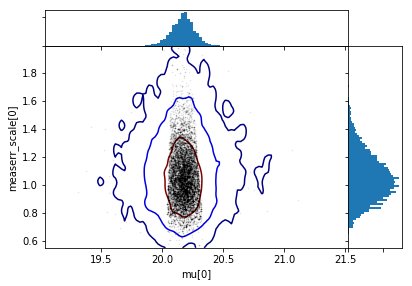

In [39]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


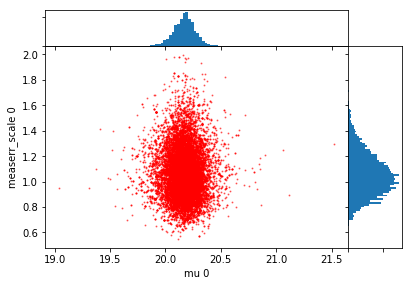

In [40]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)